### 統計的仮説検定の考え方
#### 統計的仮説検定とは
統計的仮説検定とは、「統計学的な背理法」である。
一般な仮説検定の手続きは以下のようになる。

1. どれくらい低い確率であれば「現実には起こりえない」と見なすか、その基準を決めておく。この基準を**有意水準**という。
2. ある確率分布について、何らかの仮説を立てる。これを**帰無仮説**($H_0$)という。また、帰無仮説が否定された場合に採用される、もう1つの仮説を準備する。これを**対立仮説**($H_1$)という。
3. 分布から標本を抽出する。
4. 帰無仮説を正しいものとして、3で抽出した標本から得られる確率を計算する。その結果が1で決めた有意水準よりも小さいならば、帰無仮説は真実ではないち結論して棄却し、対立仮説を受容する。確率が有意水準よりも大きいならば、帰無仮説を受容する。

ここで注意することは「帰無仮説が受容」されたからといって「帰無仮説が正しい」というわけではないことである。

#### 回帰分析と統計的仮説検定
回帰分析では、回帰係数の値に関する検定が行われる。
たとえば、「教育年数は賃金の予測に役立つか」という問題を調べたいとする。
このような場合には、以下の手続きに従って分析を行う。

1. 賃金を教育年数とその他の説明変数に回帰し、各変数の回帰係数を推定する。
2. 回帰分析の推定結果をうまく使って、帰無仮説:$H_0:\beta_{school}=0$を検定する。
3. 帰無仮説が棄却されたなら、そのときは対立仮説$H_1:\beta_{school}\neq0$を採用する。帰無仮説が棄却されなかった場合は、仮説$H_0:\beta_{school}=0$を否定できるだけの十分な根拠が得られない。したがって、教育年数の情報が、賃金の予測において役に立たない可能性がある。

### 平均値の検定
#### 問題設定
ある確率密度関数$f$について、その平均値を$\mu=\int uf(u)du$とする。
いま、この$\mu$の値について「$\mu=0$」または「$\mu\neq0$」の2つの可能性があるものとする。
そして、$f$から無作為に抽出された標本$X_1,\cdots,X_n$を利用することができるとする。

#### 正規分布の場合
母集団の分布が平均$\mu$、標準偏差1の正規分布$N(\mu,1)$であると判明しているケースを考える。

1. 有意水準の選択
ここでは、5%とする
2. 帰無仮説の設定
帰無仮説を$H_0:\mu=0$、対立仮説を$H_1:\mu\neq 0$とする
3. 標本の抽出
検定の対象となっている母集団$N(\mu,1)$から標本を抽出する。たとえば、大きさ1の標本$X=2.23$だけだ得られたものとする。
4. 帰無仮説$H_0:\mu=0$の検定
正規分布に従う確率変数$X$について$|X|<1.96$となる確率は95%、$|X|>1.96$となる確率は5%である。帰無仮説$H_0:\mu=0$のもとで標本$X=2.23$を得る確率は有意水準5%未満であるから、$H_0:\mu=0$は棄却される。

「平均値$\mu$はわからないが、分布が正規分布であることは判明している」という状況は考えづらい。
また、標本の大きさを1とするのも現実的ではない。

#### t値による方法
そこで問題設定を「母集団分布については何もわからない」とする。
検定の手続きを次のように変える。

1. 有意水準を5%とする
2. 帰無仮説を$H_0:\mu=0$、対立仮説を$H_1:\mu\neq 0$とする
3. 母集団$f$から大きさ$n$の標本を抽出する。$n$が十分に大きな数であれば、中心極限定理により、以下の式で定義される$t$は近似的に正規分布$N(0,1)$に従うものと考えられる。
$$
t=\frac{\sqrt{n}(\bar{X}_n-\mu)}{\sqrt{S_n}}
$$
ただし、$\bar{X}_n$は標本平均、$S_n$は標本分散であり、
$$
\bar{X}_n=\frac{1}{n}\sum_{i=1}^nX_i\\
S_n=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X}_n)^2
$$
である。
4. 帰無仮説$H_0:\mu=0$が正しいものとする。このとき
$$
t=\frac{\sqrt{n}}{\sqrt{S_n}}・\bar{X}_n
$$
は近似的に正規分布$N(0,1)$に従うことになる。特に、$|t|>1.96$であれば、有意水準5%で$H_0:\mu=0$は棄却される。

ここで使用されている統計量$t$を、この検定における$t値$と呼ぶ。
また、t値を用いる検定を**t検定**と呼ぶ。

#### 有意水準と棄却域
一般に帰無仮説を棄却するか否かを決定する領域を検定の**棄却域**と呼ぶ。
また、棄却するかどうかを決める基準値1.96を**棄却臨界値**と呼ぶ。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/data_5_1.csv')
print('mean')
print(data.mean())
print('\nvar')
print(data.var())

mean
distA    2.042323
distB    0.074927
dtype: float64

var
distA    0.372785
distB    0.359234
dtype: float64


In [33]:
import numpy as np
import scipy.stats as stats

print('t-value')
t_values = np.sqrt(100) / np.sqrt(data.var()) * data.mean()
print(t_values)

print('p-value')
print(stats.t.sf(t_values, df=n-1)*2)

t-value
distA    33.449949
distB     1.250113
dtype: float64
p-value
[9.27339666e-56 2.14205349e-01]


distAについては有意水準が0.1%であっても、帰無仮説$H_0:\mu=0$は棄却される。
distBについては有意水準が10%であっても帰無仮説は棄却できないことが分かる。

#### p値による方法
$t=1.25$のときに$H_0:\mu=0$を棄却するためには、有意水準をどこまで大きくする必要があるか、を考えてみる。
つまり、$N(0,1)$に従う確率変数を$Z$とするとき、$|Z|\geq 1.25$となる確率はどれくらいか、ということである。

p-value(|Z|>1.25)

normal dist:  0.2112995473337107
t dist:  0.21424633756838654


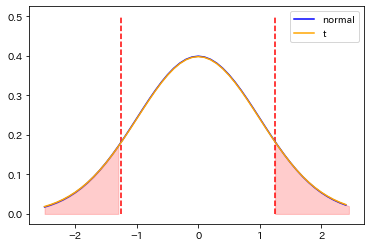

In [31]:
from scipy.stats import norm

n = len(data)

print('p-value(|Z|>1.25)\n')
print('normal dist: ', norm.sf(1.25,0,1)*2)
print('t dist: ', stats.t.sf(1.25, df=n-1)*2)

x_all = np.arange(-2.5,2.5,0.1)
x_left = np.arange(-2.5,-1.25, 0.1)
x_right = np.arange(1.25,  2.5, 0.1)

plt.plot(x_all, norm.pdf(x_all, 0, 1), color='blue', label='normal');
plt.plot(x_all, stats.t.pdf(x_all, df=n-1), color='orange', label='t');

plt.vlines([-1.25, 1.25], ymin=0,ymax=0.5, colors='red', linestyles='--')
plt.fill_between(x_left,  y1=norm.pdf(x_left,  0, 1), y2=0, alpha=.2, color='red')
plt.fill_between(x_right, y1=norm.pdf(x_right, 0, 1), y2=0, alpha=.2, color='red')
plt.legend();

およそ21%となることがわかる。この確率を当該検定におけるp値という。
したがって、分布Bについて帰無仮説$H_0:\mu=0$を棄却したいのであれば、21%の有意水準を認めるほかない。

$t$検定では有意水準を事前に決める必要があるのに対して、$p$値ではその必要がない。
$p$値を用いる方法では、帰無仮説を棄却することの妥当性が示されるが、$t$検定とは異なり、最終的な結論として帰無仮説の棄却/受容を決定しない。
したがって、有意水準の設定を避けたいのであれば$t$値よりも$p$値のほうが優れた方法であるといえ、帰無仮説の棄却についてはっきりした結論を得たいのであれば$t$値の方が優れた方法と言える。

### 回帰係数の検定
#### OLS推定量の漸近分布
単回帰分析について考える。
単回帰モデル
$$
\left\{
\begin{array}{ll}
y=\beta_0+\beta_1x+\varepsilon \\
E(y|x)=\beta_0+\beta_1x
\end{array}
\right.
$$

を仮定する。
標本$\{(y_i,x_i):i=1,\cdots,n \}$が得られたとき、回帰係数$\beta_1$のOLS推定量は
$$
\hat{\beta}_1=\frac{\sum_{i=1}^n(x_i-\bar{x}_n)(y_i-\bar{y}_n)}{\sum_{i=1}^n(x_i-\bar{x}_n)^2}
$$
によって計算される。中心極限定理を適用することで、標本平均と同様に、$\hat{\beta}_1$についても十分大きな$n$のもとで、
$$
Z_n=\frac{\sqrt{n}(\hat{\beta}_1-\beta_1)}{\sqrt{S_n}}
$$

が近似的に正規分布$N(0,1)$に従うことを示せる。
ここで$S_n$は標本分散である。
式を以下のように変形する。
$$
\hat{\beta}_1=\beta_1+\frac{\sqrt{S_n}}{\sqrt{n}}Z_n
$$
十分に大きな$n$で$Z_n$は近似的に$N(0,1)$に従うから、$\sigma=\frac{\sqrt{S_n}}{\sqrt{n}}$と書けば、$\hat{\beta}_1$は平均$\beta_1$、標準偏差$\sigma$の正規分布$N(\beta_1,\sigma^2)$に従うことになる。
この$N(\beta_1,\sigma^2)$をOLS推定量$\hat{\beta}_1$の漸近分布という。ある推定量の漸近分布の標準偏差$\sigma$を**標準誤差**という。

In [35]:
from sklearn.linear_model import LinearRegression

S = 10000 # 繰り返し回数
beta1 = np.zeros(S)

for i in range(S):
    x = np.random.randn(1000)+0.1
    y = 1+5*x+np.random.randn(1000)+0.1
    
    lm = LinearRegression()
    lm.fit(x.reshape(-1, 1), y)
    beta1[i] = lm.coef_[0]

In [36]:
pd.DataFrame(beta1).describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,4.99997,0.031627,4.865158,4.97889,5.000029,5.02128,5.127427


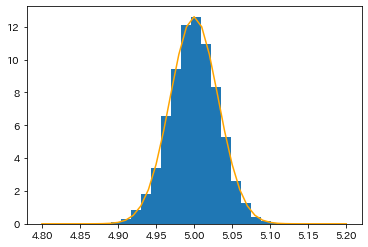

In [67]:
plt.hist(beta1, bins=20, density=True);
plt.plot(np.arange(4.8,5.2,0.01), norm.pdf(np.arange(4.8,5.2,0.01), 5, 0.031627), color='orange');

10000個の推定値は、$\beta_1=5$を中心として左右対称に分布していることがわかる。
また、$\hat{\beta}_1$の標準偏差はおよそ$\sigma=0.032$であるので、漸近分布はおおむね$N(5,(0.032)^2)$となる。

#### 回帰係数のt検定
もし$\beta_1=0$であるならば、$\hat{\beta}_1$の漸近分布は$N(0,\sigma^2)$となる。さらに、
$$
t=\frac{\hat{\beta}_1}{\sigma}
$$
によって$\hat{\beta}_1$の$t$値を定義すれば、これは正規分布$N(0,1)$に従う。
帰無仮説の下で$|t|>1.96$となる確率は5%以下のはずだから、もし$|t|>1.96$となれば有意水準5%で帰無仮説を棄却できる。

回帰係数のt検定の手順
1. 単回帰モデル$y=\beta_0+\beta_1x+\varepsilon$の係数$\beta_1$について、帰無仮説を$H_0:\beta_1=0$、対立仮説$H_1:\beta_1\neq0$とする
2. OLS推定量$\hat{\beta}_1$と、標準誤差$\sigma$を計算する
3. $t=\hat{\beta}_1/\sigma$として、$|t|>1.96$であれば、有意水準5%で帰無仮説$H_0:\beta_1=0$を棄却する

#### p値による回帰係数の検定
p値による回帰係数の検定の手順
1. 単回帰モデル$y=\beta_0+\beta_1x+\varepsilon$の係数$\beta_1$について、帰無仮説を$H_0:\beta_1=0$、対立仮説$H_1:\beta_1\neq0$とする
2. OLS推定量$\hat{\beta}_1$と、標準誤差$\sigma$を計算する
3. $t=\hat{\beta}_1/\sigma$の値を計算する
4. $N(0,1)$に従う確率変数$Z$について、$|Z|>|t|$となる確率を計算する。この値が小さいほど、帰無仮説を棄却することが容易であると考える。

#### 重回帰分析の場合
重回帰モデル
$$
\left\{
\begin{array}{ll}
y=\beta_0+\beta_1x_1+\beta_2x_2++\cdots+\beta_dx_d+\varepsilon \\
E(y|x)=\beta_0+\beta_1x_1+\beta_2x_2++\cdots+\beta_dx_d
\end{array}
\right.
$$
の場合でも、検定については単回帰と変わらない。
帰無仮説$H_0:\beta_k=0$のもとで、
$$
t_k=\frac{\sqrt{n}}{\sqrt{s_k}}\hat{\beta}_k
$$
が$N(0,1)$に従う。ここで、$s_k$は標本に基づいて計算される値である。
もし、$|t_k|>1.96$であれば、融資水準5%のもとで$H_0:\beta_k=0$が棄却される。

In [55]:
data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/data_Males.csv')
data.head()

,school,exper,wage
0,14,1,1.197540
1,13,4,1.675962
2,12,4,1.515963
3,12,2,1.894115
4,12,5,1.948775


In [61]:
import  statsmodels.api as sm

df_X = sm.add_constant(data[['school','exper']])
df_y = data['wage']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     24.42
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           7.01e-11
Time:                        10:00:33   Log-Likelihood:                -430.87
No. Observations:                 545   AIC:                             867.7
Df Residuals:                     542   BIC:                             880.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1611      0.224     -0.718      0.4

たとえばschoolの回帰係数$\hat{\beta}_{school}$は、真の回帰係数$\beta_{school}$を中心とする正規分布$N(\beta_{school},(0.016)^2)$に従っているものとみなせる。また、$\hat{\beta}_{exper}$の漸近分布は$N(\beta_{exper},(0.017)^2)$と考えられる。
帰無仮説$H_0:\beta_{school}$に対するt値は、$t=\hat{\beta}_{exper}/\sigma_{school}$となっている。

In [69]:
t_value = 0.1085 / 0.016
print('t-value: ', t_value)

p_value = stats.t.sf(t_value, df=n-1)*2
print('p-value: ', p_value)

t-value:  6.78125
p-value:  8.748991505782372e-10


この回帰において、schoolとexperは有意な変数といえる。

### 信頼区間
#### 回帰係数の信頼区間
回帰係数の推定量$\hat{\beta}=(\hat{\beta}_0,\hat{\beta}_1,\cdots,\hat{\beta}_d)$の各要素$\hat{\beta}_k(k=0,1,\cdots,d)$について信頼区間を構成することを考える。
たとえば$\hat{\beta}_k$の漸近分布が$N(\hat{\beta}_k,\sigma^2_k)$であるとする。$n$が十分大きいときには、
$$
Z_k=\frac{\hat{\beta}_k-\beta_k}{\sigma_k}
$$
は$N(0,1)$に従うものと見なせるとする。
よって十分に大きな$n$のもとでは、
$$
P(|Z_k|<1.96)=P\biggl(-1.96\leq \frac{\hat{\beta}_k-\beta_k}{\sigma_k}\leq 1.96 \biggr)=0.95
$$
と近似できるはずである。
これにより、$\beta_k$の95%信頼区間は
$$
\hat{\beta}_k-1.96\sigma_k\leq \beta_k\leq \hat{\beta}+1.96\sigma_k
$$
となる。

In [92]:
CI = pd.DataFrame({'lower_bound':result.params - 1.96 * result.bse,
                   'upper_bound':result.params + 1.96 * result.bse})
CI

,lower_bound,upper_bound
const,-0.600891,0.278691
school,0.076894,0.140035
exper,0.058969,0.125645


$\beta_{school}$の信頼区間はおよそ0.08～0.14、$\beta_{exper}$の信頼区間はおよそ0.06～0.12であることがわかる。
$t$検定ではわからなかった推定精度の評価が可能となった。

In [65]:
?plt.hist